> Universidade do Estado do Amazonas</br>
Escola Superior de Tecnologia</br>
Prof. Rubelmar Neto</br>
Aluno: Natanael Lucena de Medeiros (matrícula: 2015080042)




### **Fundamentos de Mecânica dos Sólidos e Fluidos**

---


# **Atividade 3 - Barril secando com vazão desconhecida**
> 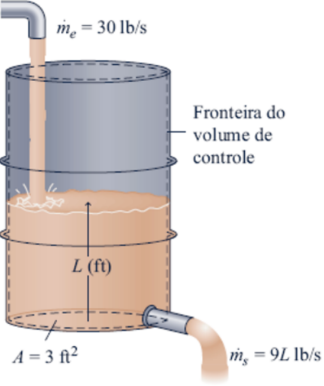



1. Considerando o diâmetro da tubulação de saída igual a $(2,5 + 0,02\beta)$ $in$, obtenha a velocidade de saída através da equação de Bernoulli. Após a obtenção da velocidade de saída, obtenha a vazão mássica de saída e a EDO que descreve a variação temporal da altura do nível de água dentro do barril. Resolva a EDO via método numérico de Euler e comente qual número mínimo de pontos a serem utilizados para uma solução satisfatória (faça o upload de um gif animado variando o número de pontos, com o seu nome no gráfico). Analisando o enchimento do barril até 60s, podemos afirmar que o regime estacionário foi alcançado? Justifique matematicamente a sua resposta.

Valor de $\beta$ considerado para a resolução da questão: $\beta = 53$


## Dados fornecidos

Aceleração da gravidade:
\begin{align}
  g = 32.2 \ ft/s²
\end{align}

Diâmetro do furo na base do tanque:
\begin{align}
  d_0 = \frac{2.5 + 0.02 \times 53}{12} = 3.56 \ in ≈ 0.3 \ ft
\end{align}

Área do furo na base do tanque:
\begin{align}
  A_0 = \frac{\pi d_0²}4 = \frac{\pi(0.3)²}4 ≈ 7 \times 10^{-2} \ ft²
\end{align}


## Equação de Bernoulli

Aplicando a equação de Bernoulli, podemos determinar a velocidade de saída.

\begin{align}
  \frac{p_1}ρ + \frac{v_1²}2 + gz_1 = \frac{p_2}ρ + \frac{{v_2}²}2 + gz_2
\end{align}

Nesse caso, $p_2 = p_1 = 0$ (pressão manométrica) e $v_1 ≈ 0$. Logo, simplificando a equação de bernoulli para essas condições, temos:

\begin{align}
  z_1 = \frac{{v_2}^2}{2g} + z_2
\end{align}

Resolvendo para a velocidade de saída $v_2$, tem-se:
\begin{align}
  v_2 = \sqrt{2g(z_1 - z_2)} = \sqrt{2g \ h(t)}
\end{align}

## Equação diferencial para a altura do nível de água no tanque

Calculando a vazão mássica através do furo na saída, temos:

\begin{align}
  ṁ_{saída} = ρ_2 A_2 v_2 = ρ\frac{\pi}4 {d_0}^2\sqrt{2g \ h(t)} = \rho A_0 \sqrt{2g \ h(t)}
\end{align}

A substituição desse resultado na equação de conservação da massa fornece:

\begin{align}
  \frac{d}{dt}(\rho A h) = ṁ_e - \rho A_0 \sqrt{2 g \ h(t)}
\end{align}

A massa específica e a área do tanque são constantes, logo, podem ser colocados fora do operador derivada do lado esquerdo da equação. Isolando o termo $\frac{dh}{dt}$, obtemos:

\begin{align}
  \frac{dh}{dt} = \frac{ṁ_e}{\rho A} - \frac{A_0}A \sqrt{2 g \ h(t)}
\end{align}

Essa é uma equação diferencial não linear de difícil solução analítica. O método de separação de variáveis não resolve uma equação diferencial desse tipo. A melhor alternativa é obter uma resposta aproximada utilizando um método numérico.

## Solução da Equação Diferencial Ordinária (EDO) implementando o método numérico de Euler

In [98]:
import math
import numpy as np

g = 32.2      # Aceleração da gravidade (ft/s²)
m_e = 30      # Vazão mássica de entrada (lb/s)
rho = 62.4    # Massa específica da água (lb/ft²)
A = 3         # Área da base do tanque (ft²)
A_0 = 0.07    # Área do furo na base do tanque (ft²)

def get_points(numPoints: int):
  dt = 120/numPoints
  hNum = {0: 0}
  listNum = [(0, hNum[0])]
  f = lambda t: m_e/(rho*A) - (A_0/A) * math.sqrt(2*g*hNum[round(t, 4)])
  for i in np.arange(0, 121, dt):
    hNum[round(i+dt, 4)] = hNum[round(i, 4)] + dt*f(i)
    listNum.append((i + dt, hNum[round(i+dt, 4)]))
  return listNum

points_list = [get_points(x) for x in range(10, 171, 20)]

In [ ]:
# gif animation library installation

!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install -U manim==0.3.0
!pip install IPython --upgrade

In [ ]:
%%manim Graph -qm -v WARNING --disable_caching

from manim import *

class Graph(GraphScene):
  def setup(self):
    text = Tex("Método de Euler")
    text.to_corner(UP)
    name_text = Tex("Natanael Lucena de Medeiros")
    name_text.scale(0.64)
    name_text.to_corner(RIGHT + UP*3)
    self.play(Write(text))
    self.play(Write(name_text))
    self.y_min = 0
    self.y_max = 1
    self.x_max = 120
    self.x_min = 0
    self.x_axis_width = 10.5
    self.x_labeled_nums = range(0, 121, 20)
    self.y_labeled_nums = range(3)
    self.x_axis_label = "$t(s)$"
    self.y_axis_label = "$L(ft)$"
    self.graph_origin = (-5.75, -3, 0)
    super().setup()
    self.setup_axes(animate=True)

  def construct(self):
    for lst in points_list:
      moves = []
      for point in lst:
        dot = Dot(point=(-5, point[1]-1, 0), color=RED, radius=0.025)
        moves.append(dot.animate.move_to(self.coords_to_point(*point)))
      self.play(*moves)

## Conclusão

Se pegarmos, por exemplo, o valor de h(t=120), temos como resultado:

In [124]:
def get_h_value_at(x, points_qty = 512):
  return next(filter(lambda p: p[0] == x, get_points(points_qty)))[1]

print("h(120) =", get_h_value_at(120))

h(120) = 0.7324717081678037


E se pergarmos o valor de h(t=60), temos:

In [125]:
print("h(60) =", get_h_value_at(60))

h(60) = 0.7317847331212971


Com isso, conclui-se que $|h(60) - h(120)| ≈ 0.0007 ≈ 0$. Logo pode-se dizer que sim, o regime estacinário é alcançado em $t=60s$, já que o nível de água e as demais características do fluido permanecem aproximadamente constantes.

Considerando um número mínimo de x pontos para uma solução satisfatória, obtemos:


In [126]:
print("(considerando apenas 10 pontos) h(60) =", get_h_value_at(60, points_qty=10))

(considerando apenas 10 pontos) h(60) = 0.732544109330548


Considerando que o valor esperado é $h_{esperado}(60) = 0.73178473$, calculando uma margem de erro para o número mínimo de pontos, obtemos:

\begin{align}
  E = \frac{|h_{esperado}(t) - h_{obtido}(t)| \times 100}{h_{esperado}(t)} = \frac{|0.73178473 - 0.73254410| \times 100}{0.73178473} ≈ 0.1\%
\end{align}

Logo, para uma solução satisfatória pode ser considerado um número mínimo de 10 pontos, com 0.1% de margem de erro.